In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = "C:/Users/antar/Documents/Obsidian Vault/Projects/Coldplay_NLP/sentiment_outputs/sentiment_analysis_results_final.csv"
df = pd.read_csv(filepath)

In [3]:
df.columns

Index(['#', 'Album Number', 'Album Name', 'Album Release Date', 'Track Number',
       'Track Name', 'Lyrics', 'lyrics_clean',
       'siebert/sentiment-roberta-large-english_sentiment',
       'siebert/sentiment-roberta-large-english_confidence',
       'siebert/sentiment-roberta-large-english_pos_prob',
       'cardiffnlp/twitter-roberta-base-sentiment_sentiment',
       'cardiffnlp/twitter-roberta-base-sentiment_confidence',
       'cardiffnlp/twitter-roberta-base-sentiment_pos_prob',
       'jialicheng/electra-base-imdb_sentiment',
       'jialicheng/electra-base-imdb_confidence',
       'jialicheng/electra-base-imdb_pos_prob',
       'textattack/albert-base-v2-SST-2_sentiment',
       'textattack/albert-base-v2-SST-2_confidence',
       'textattack/albert-base-v2-SST-2_pos_prob',
       'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_sentiment',
       'dipawidia/xlnet-base-cased-product-review-sentiment-analysis_confidence',
       'dipawidia/xlnet-base-cased-produc

In [4]:
# Correcting the logic for 'sentiment_final'
# If siebert and jialicheng agree, the final sentiment should be their agreed sentiment.
# If not, use distilbert sentiment.

def correct_final_sentiment(row):
    siebert_sentiment = row['siebert/sentiment-roberta-large-english_sentiment']
    jialicheng_sentiment = row['dipawidia/xlnet-base-cased-product-review-sentiment-analysis_sentiment']
    distilbert_sentiment = row['distilbert-base-uncased-finetuned-sst-2-english_sentiment']
    
    if siebert_sentiment == jialicheng_sentiment:
        return siebert_sentiment  # or jialicheng_sentiment, since they are equal
    else:
        return distilbert_sentiment

df['sentiment_final'] = df.apply(correct_final_sentiment, axis=1)


df['sentiment_final'].head()


0    POSITIVE
1    NEGATIVE
2    NEGATIVE
3    POSITIVE
4    POSITIVE
Name: sentiment_final, dtype: object

In [5]:
df['sentiment_final'].isnull().sum()

0

In [6]:
# Create the 'final_pos_prob' column based on the specified logic
# If Siebert and Jialicheng agree, take the average of their pos_prob
# If they do not agree, use the pos_prob from DistilBERT

def calculate_final_pos_prob(row):
    siebert_prob = row['siebert/sentiment-roberta-large-english_confidence']
    jialicheng_prob = row['dipawidia/xlnet-base-cased-product-review-sentiment-analysis_pos_prob']
    distilbert_prob = row['distilbert-base-uncased-finetuned-sst-2-english_pos_prob']
    
    siebert_sentiment = row['siebert/sentiment-roberta-large-english_sentiment']
    jialicheng_sentiment = row['dipawidia/xlnet-base-cased-product-review-sentiment-analysis_sentiment']
    
    if siebert_sentiment == jialicheng_sentiment:
        return (siebert_prob + jialicheng_prob) / 2
    else:
        return distilbert_prob

df['final_pos_prob'] = df.apply(calculate_final_pos_prob, axis=1)



df['final_pos_prob'].head()


0    0.969749
1    0.538813
2    0.501539
3    0.999466
4    0.999030
Name: final_pos_prob, dtype: float64

In [10]:
# Select the specified columns to save to an Excel file
selected_columns = [
    '#', 'Album Number', 'Album Name', 'Album Release Date', 'Track Number',
    'Track Name', 'Lyrics', 'lyrics_clean', 'sentiment_final', 'final_pos_prob'
]

# Create a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Define the path for the output Excel file
output_excel_path = 'C:/Users/antar/Documents/Obsidian Vault/Projects/Coldplay_NLP/data/sentiment_analysis_final_results.xlsx'

# Save the DataFrame to an Excel file
#selected_df.to_excel(output_excel_path, index=False)

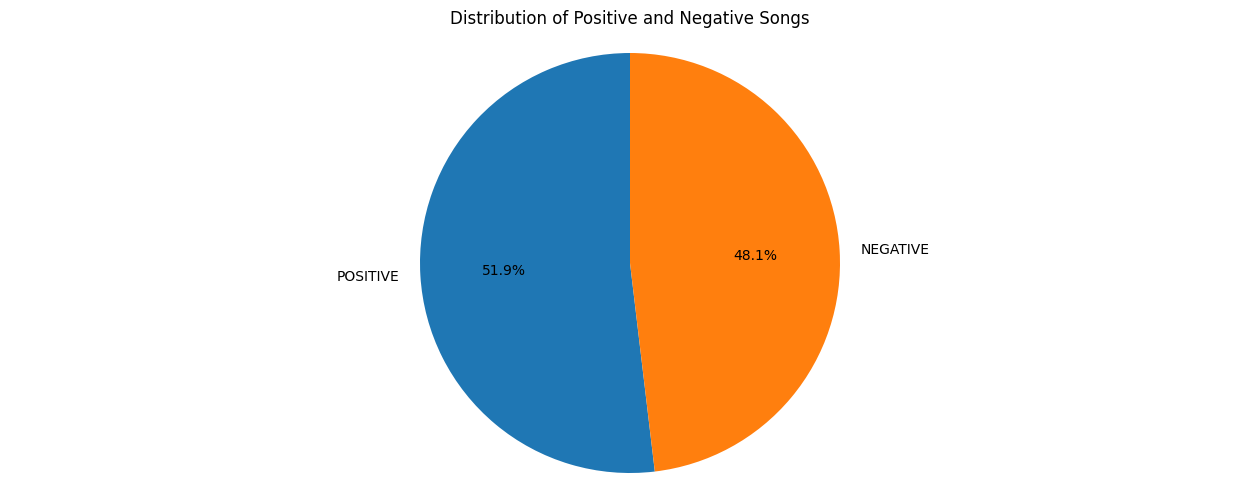

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment_final'].value_counts()

# Plot a pie chart
plt.figure(figsize=(16, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Positive and Negative Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [13]:
# Count the number of songs where Siebert and Jialicheng agree
agreement_count = df[df['siebert/sentiment-roberta-large-english_sentiment'] == df['dipawidia/xlnet-base-cased-product-review-sentiment-analysis_sentiment']].shape[0]

agreement_count


54

In [18]:
audio_features_df = pd.read_excel("C:/Users/antar/Documents/Obsidian Vault/Projects/Coldplay_NLP/data/spotify_audio_features.xlsx")

In [19]:
# Merge the selected DataFrame with the audio features DataFrame on the index
merged_df = pd.concat([selected_df.reset_index(drop=True), audio_features_df.reset_index(drop=True)], axis=1)


merged_df.head()


,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics,lyrics_clean,sentiment_final,final_pos_prob,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought...","bones, sinking like stones\nall that we fought...",POSITIVE,0.969749,...,0.1070,0.4530,122.062,audio_features,2QhURnm7mQDxBb5jWkbDug,spotify:track:2QhURnm7mQDxBb5jWkbDug,https://api.spotify.com/v1/tracks/2QhURnm7mQDx...,https://api.spotify.com/v1/audio-analysis/2QhU...,136867,4
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...,so i look in your direction\nbut you pay me no...,NEGATIVE,0.538813,...,0.0688,0.2860,116.705,audio_features,0qksx8mV28lztYIZ1om8ml,spotify:track:0qksx8mV28lztYIZ1om8ml,https://api.spotify.com/v1/tracks/0qksx8mV28lz...,https://api.spotify.com/v1/audio-analysis/0qks...,304200,3
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How...","i awake to find no peace of mind\ni said, ""how...",NEGATIVE,0.501539,...,0.0635,0.0732,147.599,audio_features,2mLgOcRkEgq89j8WstUpui,spotify:track:2mLgOcRkEgq89j8WstUpui,https://api.spotify.com/v1/tracks/2mLgOcRkEgq8...,https://api.spotify.com/v1/audio-analysis/2mLg...,318773,4
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...,did i drive you away?\ni know what you'll say\...,POSITIVE,0.999466,...,0.1040,0.1650,102.617,audio_features,7D0RhFcb3CrfPuTJ0obrod,spotify:track:7D0RhFcb3CrfPuTJ0obrod,https://api.spotify.com/v1/tracks/7D0RhFcb3Crf...,https://api.spotify.com/v1/audio-analysis/7D0R...,227093,3
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...,look at the stars\nlook how they shine for you...,POSITIVE,0.999030,...,0.2340,0.2850,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4


In [20]:
merged_df.columns

Index(['#', 'Album Number', 'Album Name', 'Album Release Date', 'Track Number',
       'Track Name', 'Lyrics', 'lyrics_clean', 'sentiment_final',
       'final_pos_prob', 'track_id', 'track_name', 'album_name', 'album_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [21]:
# Check if 'Album Name' always equals 'album_name'
album_name_comparison = (merged_df['Album Name'] == merged_df['album_name'])

# Verify if all entries are True
all_equal = album_name_comparison.all()

# Count how many rows are not equal
not_equal_count = len(merged_df) - album_name_comparison.sum()

all_equal, not_equal_count


(True, 0)

In [22]:
# Drop the specified columns from the merged DataFrame
merged_df.drop(columns=['track_name', 'album_name'], inplace=True)


merged_df.head()


,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics,lyrics_clean,sentiment_final,final_pos_prob,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought...","bones, sinking like stones\nall that we fought...",POSITIVE,0.969749,...,0.1070,0.4530,122.062,audio_features,2QhURnm7mQDxBb5jWkbDug,spotify:track:2QhURnm7mQDxBb5jWkbDug,https://api.spotify.com/v1/tracks/2QhURnm7mQDx...,https://api.spotify.com/v1/audio-analysis/2QhU...,136867,4
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...,so i look in your direction\nbut you pay me no...,NEGATIVE,0.538813,...,0.0688,0.2860,116.705,audio_features,0qksx8mV28lztYIZ1om8ml,spotify:track:0qksx8mV28lztYIZ1om8ml,https://api.spotify.com/v1/tracks/0qksx8mV28lz...,https://api.spotify.com/v1/audio-analysis/0qks...,304200,3
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How...","i awake to find no peace of mind\ni said, ""how...",NEGATIVE,0.501539,...,0.0635,0.0732,147.599,audio_features,2mLgOcRkEgq89j8WstUpui,spotify:track:2mLgOcRkEgq89j8WstUpui,https://api.spotify.com/v1/tracks/2mLgOcRkEgq8...,https://api.spotify.com/v1/audio-analysis/2mLg...,318773,4
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...,did i drive you away?\ni know what you'll say\...,POSITIVE,0.999466,...,0.1040,0.1650,102.617,audio_features,7D0RhFcb3CrfPuTJ0obrod,spotify:track:7D0RhFcb3CrfPuTJ0obrod,https://api.spotify.com/v1/tracks/7D0RhFcb3Crf...,https://api.spotify.com/v1/audio-analysis/7D0R...,227093,3
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...,look at the stars\nlook how they shine for you...,POSITIVE,0.999030,...,0.2340,0.2850,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4


In [23]:
# Define the path for the output Excel file
output_excel_merged_path = 'C:/Users/antar/Documents/Obsidian Vault/Projects/Coldplay_NLP/data/merged_coldplay_lyrics_sentiment_audio_features.xlsx'

# Save the merged DataFrame to an Excel file
merged_df.to_excel(output_excel_merged_path, index=False)



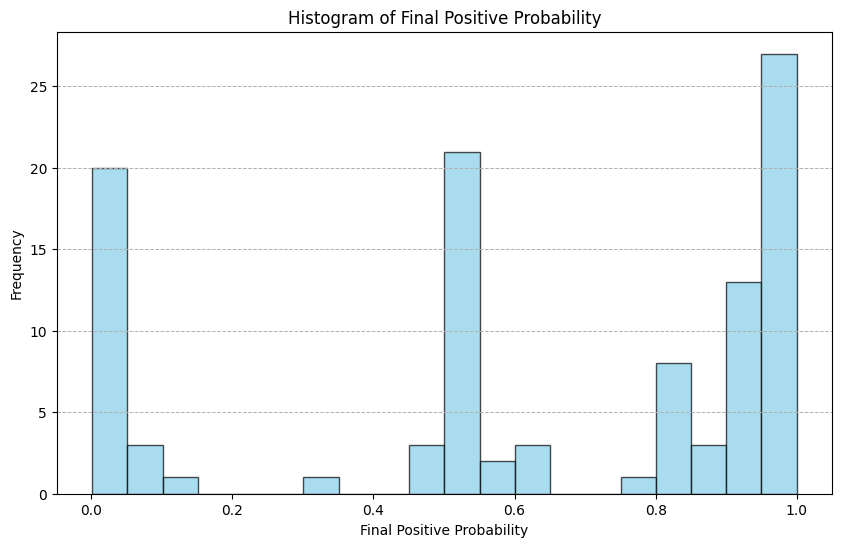

In [24]:
# Plotting the histogram for final_pos_prob
plt.figure(figsize=(10, 6))
plt.hist(merged_df['final_pos_prob'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Final Positive Probability')
plt.xlabel('Final Positive Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()
